#Description:
Ingest data from the latest New York Times county-level COVID-19 database
at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv. Filter the data for a chosen county in a
chosen state, calculate the daily count of new cases and new deaths, print the most recent 30 day' worth of data for
the selected county, and perform an EDA and show your findings through different plots and visualization
techniques.

Task 1: Environment set-up

Task 2: Data collection

Task 3: Data wrangling and EDA (exploratory data analysis)

Task 4: Understand NY COVID 19 data in last 30 days

Task 5: Comparing COVID 19 data from different states

Task 6: Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

#read data
df1 =pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df1

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,56037.0,3280,26.0
936739,2021-01-16,Teton,Wyoming,56039.0,2614,4.0
936740,2021-01-16,Uinta,Wyoming,56041.0,1813,9.0
936741,2021-01-16,Washakie,Wyoming,56043.0,841,23.0


In [2]:
#Data exploration
df1.describe()

,fips,cases,deaths
count,927998.000000,9.367430e+05,916734.000000
mean,31272.235882,2.220427e+03,57.090916
std,16300.652394,1.163864e+04,461.272771
min,1001.000000,0.000000e+00,0.000000
25%,19001.000000,4.100000e+01,0.000000
50%,29217.000000,2.650000e+02,5.000000
75%,46101.000000,1.142000e+03,24.000000
max,78030.000000,1.004322e+06,25970.000000


In [3]:
#Count the frequency of each state in descending order
df1.groupby(['state'])['state'].count().sort_values(ascending=False)

state
Texas                       71066
Georgia                     47769
Virginia                    39014
Kentucky                    34732
Missouri                    33205
Illinois                    29869
North Carolina              29608
Iowa                        28870
Kansas                      28557
Tennessee                   28447
Indiana                     27542
Ohio                        26250
Minnesota                   25467
Michigan                    24714
Mississippi                 24566
Nebraska                    24096
Arkansas                    22400
Oklahoma                    22328
Wisconsin                   21287
Florida                     20586
Puerto Rico                 20319
Pennsylvania                20147
Alabama                     20018
Louisiana                   19573
Colorado                    18679
South Dakota                17740
New York                    17736
California                  17729
West Virginia               15726
North Da

In [4]:
#Cleaning data and focus on the maximum num of each states, which is the most recent day data
df2=df1.drop('fips',axis=1).drop('county',axis=1).groupby("state").max()
df2

,date,cases,deaths
state,,,
Alabama,2021-01-16,61755,921.0
Alaska,2021-01-16,24467,127.0
Arizona,2021-01-16,416480,6437.0
Arkansas,2021-01-16,30116,450.0
California,2021-01-16,1004322,13741.0
Colorado,2021-01-16,53158,720.0
Connecticut,2021-01-16,65725,1992.0
Delaware,2021-01-16,39678,509.0
District of Columbia,2021-01-16,33537,847.0


In [5]:
# Selecting 4 states and get the data
df3=df2.loc[['New York','Texas','Pennsylvania','New Jersey']]
df3

,date,cases,deaths
state,,,
New York,2021-01-16,524231,25970.0
Texas,2021-01-16,281422,3777.0
Pennsylvania,2021-01-16,102837,2723.0
New Jersey,2021-01-16,60224,2476.0


<AxesSubplot:xlabel='state'>

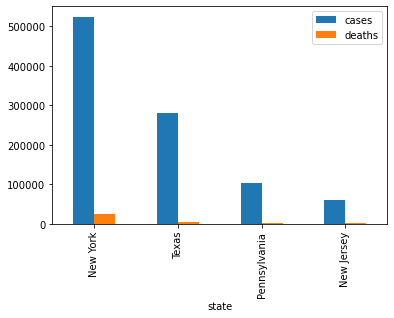

In [6]:
df3.plot(kind='bar')

In [7]:
#get data in New York state
df4=df1[df1['state']== 'New York']
df4

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
519,2020-03-04,Westchester,New York,36119.0,9,0.0
...,...,...,...,...,...,...
935396,2021-01-16,Washington,New York,36115.0,1424,21.0
935397,2021-01-16,Wayne,New York,36117.0,3568,50.0
935398,2021-01-16,Westchester,New York,36119.0,82932,1780.0
935399,2021-01-16,Wyoming,New York,36121.0,2075,41.0


In [8]:
#Filtering New York city in county as df4
#And get the daily total count of cases and deaths
df5=df4[df4['county']== 'New York City'].drop('fips',axis=1) #clean fips
df5

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0.0
448,2020-03-02,New York City,New York,1,0.0
482,2020-03-03,New York City,New York,2,0.0
518,2020-03-04,New York City,New York,2,0.0
565,2020-03-05,New York City,New York,4,0.0
...,...,...,...,...,...
922390,2021-01-12,New York City,New York,498877,25698.0
925636,2021-01-13,New York City,New York,504826,25741.0
928881,2021-01-14,New York City,New York,510711,25834.0
932126,2021-01-15,New York City,New York,517963,25909.0


In [9]:
#Add a new column and caculate the daily count of new cases
df5['new cases']=df4['cases'].diff()
df5

,date,county,state,cases,deaths,new cases
416,2020-03-01,New York City,New York,1,0.0,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0
518,2020-03-04,New York City,New York,2,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,3.0
...,...,...,...,...,...,...
922390,2021-01-12,New York City,New York,498877,25698.0,393380.0
925636,2021-01-13,New York City,New York,504826,25741.0,397872.0
928881,2021-01-14,New York City,New York,510711,25834.0,402585.0
932126,2021-01-15,New York City,New York,517963,25909.0,407979.0


In [10]:
df5['new deaths']=df4['deaths'].diff()
df5

,date,county,state,cases,deaths,new cases,new deaths
416,2020-03-01,New York City,New York,1,0.0,NaN,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0,0.0
518,2020-03-04,New York City,New York,2,0.0,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,3.0,0.0
...,...,...,...,...,...,...,...
922390,2021-01-12,New York City,New York,498877,25698.0,393380.0,23202.0
925636,2021-01-13,New York City,New York,504826,25741.0,397872.0,23237.0
928881,2021-01-14,New York City,New York,510711,25834.0,402585.0,23326.0
932126,2021-01-15,New York City,New York,517963,25909.0,407979.0,23391.0


In [11]:
#check the missing value
df5.isnull().sum()

date          0
county        0
state         0
cases         0
deaths        0
new cases     1
new deaths    1
dtype: int64

In [12]:
#print the most recent 30 days data in NYC
df6 = df5[df5['county']== 'New York City'].tail(30)
df6

,date,county,state,cases,deaths,new cases,new deaths
841259,2020-12-18,New York City,New York,377728,24652.0,303070.0,22338.0
844505,2020-12-19,New York City,New York,381067,24677.0,305646.0,22359.0
847750,2020-12-20,New York City,New York,383808,24697.0,307486.0,22372.0
850995,2020-12-21,New York City,New York,387595,24735.0,310507.0,22404.0
854240,2020-12-22,New York City,New York,391634,24768.0,313666.0,22431.0
857485,2020-12-23,New York City,New York,395810,24790.0,316827.0,22444.0
860730,2020-12-24,New York City,New York,401251,24842.0,321248.0,22488.0
863975,2020-12-25,New York City,New York,405857,24889.0,324758.0,22533.0
867220,2020-12-26,New York City,New York,410048,24931.0,327815.0,22572.0
870465,2020-12-27,New York City,New York,413472,24973.0,330427.0,22610.0


In [13]:
#summary sta of the most 30 days 
df6.describe()

,cases,deaths,new cases,new deaths
count,30.000000,30.000000,30.000000,30.000000
mean,443291.566667,25219.300000,352190.566667,22807.366667
std,44746.739270,390.235663,33286.154357,323.968866
min,377728.000000,24652.000000,303070.000000,22338.000000
25%,406904.750000,24899.500000,325522.250000,22542.750000
50%,439693.500000,25198.500000,349529.000000,22793.500000
75%,479544.000000,25492.000000,378798.500000,23024.000000
max,524231.000000,25970.000000,412838.000000,23441.000000


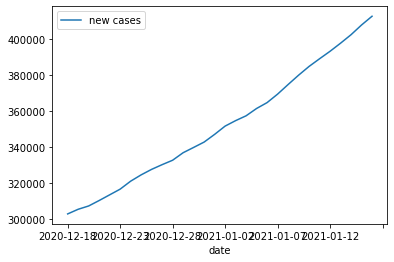

In [14]:
# gca stands for 'get current axis'
#plot for new daily cases
ax = plot.gca()
df6.plot(kind='line',x='date',y='new cases',ax=ax)
plot.show()

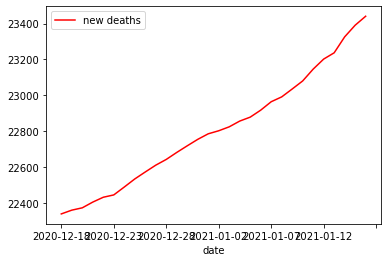

In [15]:
#plot for new daily deaths
ax = plot.gca()
df6.plot(kind='line',x='date',y='new deaths', color='red', ax=ax)
plot.show()